In [ ]:
# Basic libraries import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib notebook

In [ ]:
# tkinter GUI import
import tkinter as tk1
from tkinter.filedialog import askopenfilename

In [3]:
# Debugger import library if required
from IPython.core.debugger import set_trace

In [4]:
# Import filename interactively
root = tk1.Tk()
root.lift()
root.attributes("-topmost", True)
root.withdraw()
filename = askopenfilename()
root.destroy()

In [5]:
filename

'D:/Projects/App/Code/Data/BS6Prodn01Jan2020To31May2020/BS6Prodn01Jan2020To31May2020/MB1A3GCD0LRFE0037.csv'

In [6]:
# Read the raw dataframe and read 'obu_timestamp' column as datetime format
data = pd.read_csv(filename,parse_dates=['eventTime'])

In [7]:
# Add an index column to the created dataframe
data.reset_index(level=0, inplace=True)

In [8]:
# Verify dataframe dtypes and column entries
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16824 entries, 0 to 16823
Columns: 153 entries, index to eventTime
dtypes: datetime64[ns](1), float64(118), int64(22), object(12)
memory usage: 19.6+ MB


In [9]:
# Peep into the first 5 lines of data
data.head(5)

,index,Unnamed: 0,obu_id,packet_sequence_id,p_frequency,event_utc,publish_utc,latitude,longitude,altitude,...,device_kafka_diff,vpart_number,timestamp_epoch,overspeed,fuel_level,year,month,date,hour,eventTime
0,0,0,2002031004,557,6.0,2020-06-04 12:31:12.000,2020-06-04 12:32:32.000,15.806974,76.176800,610.46,...,80,CDE161522H0001,1970-01-19 10:01:13.872,0,264.0,2020,June,2020-06-04,18,2020-06-04 18:01:12
1,1,1,2002031004,558,6.0,2020-06-04 12:31:18.000,2020-06-04 12:32:33.000,15.806976,76.176795,612.66,...,75,CDE161522H0001,1970-01-19 10:01:13.878,0,264.0,2020,June,2020-06-04,18,2020-06-04 18:01:18
2,2,2,2002031004,559,6.0,2020-06-04 12:31:24.000,2020-06-04 12:32:34.000,15.807011,76.176774,614.66,...,70,CDE161522H0001,1970-01-19 10:01:13.884,0,264.0,2020,June,2020-06-04,18,2020-06-04 18:01:24
3,3,3,2002031004,560,6.0,2020-06-04 12:31:30.000,2020-06-04 12:32:35.000,15.807245,76.176772,614.56,...,65,CDE161522H0001,1970-01-19 10:01:13.890,0,264.0,2020,June,2020-06-04,18,2020-06-04 18:01:30
4,4,4,2002031004,561,6.0,2020-06-04 12:31:36.000,2020-06-04 12:32:36.000,15.807732,76.176711,614.05,...,60,CDE161522H0001,1970-01-19 10:01:13.896,0,264.0,2020,June,2020-06-04,18,2020-06-04 18:01:36


In [10]:
#data['BSFC_rating'] = 0

In [11]:
for rows in data.index: # loops through entire dataframe based on size
    #set_trace()
    ## BSFC zone rating
    if(data.engine_speed.iloc[rows]>2300):
        data.at[rows,'BSFC_rating'] = 1
    ##
    if((data.engine_speed.iloc[rows] < 2300) & 
       (data.engine_speed.iloc[rows] > 2100) &
       (data.actual_engine_percent_torque.iloc[rows] > 40)):
        data.at[rows,'BSFC_rating'] = 3
    if((data.engine_speed.iloc[rows] < 2300) & 
       (data.engine_speed.iloc[rows] > 2100) &
       (data.actual_engine_percent_torque.iloc[rows] < 40)):
        data.at[rows,'BSFC_rating'] = 1
    ##
    if((data.engine_speed.iloc[rows] < 2100) & 
       (data.engine_speed.iloc[rows] > 1900) &
       (data.actual_engine_percent_torque.iloc[rows] > 40)):
        data.at[rows,'BSFC_rating'] = 4
    if((data.engine_speed.iloc[rows] < 2100) & 
       (data.engine_speed.iloc[rows] > 1900) &
       (data.actual_engine_percent_torque.iloc[rows] < 40)):
        data.at[rows,'BSFC_rating'] = 1
    ##
    if((data.engine_speed.iloc[rows] < 1900) & 
       (data.engine_speed.iloc[rows] > 1200) &
       (data.actual_engine_percent_torque.iloc[rows] > 60)):
        data.at[rows,'BSFC_rating'] = 5
    if((data.engine_speed.iloc[rows] < 1900) & 
       (data.engine_speed.iloc[rows] > 1200) &
       (data.actual_engine_percent_torque.iloc[rows] < 60) &
       (data.actual_engine_percent_torque.iloc[rows] > 40)):
        data.at[rows,'BSFC_rating'] = 4
    if((data.engine_speed.iloc[rows] < 1900) & 
       (data.engine_speed.iloc[rows] > 1200) &
       (data.actual_engine_percent_torque.iloc[rows] < 40)):
        data.at[rows,'BSFC_rating'] = 1
    ##
    if((data.engine_speed.iloc[rows] < 1200) & 
       (data.engine_speed.iloc[rows] > 1000) &
       (data.actual_engine_percent_torque.iloc[rows] > 40)):
        data.at[rows,'BSFC_rating'] = 3
    if((data.engine_speed.iloc[rows] < 1200) & 
       (data.engine_speed.iloc[rows] > 1000) &
       (data.actual_engine_percent_torque.iloc[rows] < 40)):
        data.at[rows,'BSFC_rating'] = 1
    ##
    if((data.engine_speed.iloc[rows] < 1000) &
       (data.actual_engine_percent_torque.iloc[rows] > 40)):
        data.at[rows,'BSFC_rating'] = 2
    if((data.engine_speed.iloc[rows] < 1000) & 
       (data.actual_engine_percent_torque.iloc[rows] < 40) & 
       (data.actual_engine_percent_torque.iloc[rows] > 20)):
        data.at[rows,'BSFC_rating'] = 1
    if((data.engine_speed.iloc[rows] < 1000) & 
       (data.actual_engine_percent_torque.iloc[rows] < 20)):
        data.at[rows,'BSFC_rating'] = 3
    
    if(data.clutch_pedal.iloc[rows]==1):
        if(data.engine_speed.iloc[rows]>2000):
            data.at[rows,'gear_change'] = "Not OK"
        else:
            data.at[rows,'gear_change'] = "OK"
    #if(data.)
 

In [12]:
for rows in data.index[1:]:
    #set_trace()
    acc = (data.wheel_based_speed.iloc[rows]*5/18 - data.wheel_based_speed.iloc[rows-1]*5/18)/(data.eventTime.iloc[rows].second - data.eventTime.iloc[rows-1].second)
    data.at[rows, 'acceleration_6s'] = acc

C:\Users\devanandh.v\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\devanandh.v\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


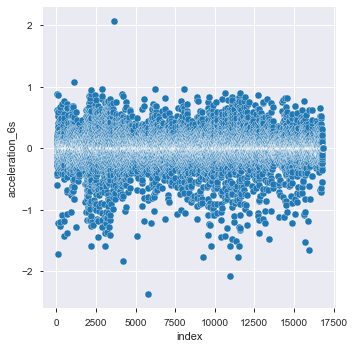

In [13]:
sns.pairplot(data,x_vars='index',y_vars='acceleration_6s',size=5)

In [14]:
# Check total instances of Igntion On and OFF
data['ignition_status'].value_counts()

1.0    16028
0.0      796
Name: ignition_status, dtype: int64

In [15]:
## No. of trips extractor 

# Variable initilization
trip_id = 1 
trip_info_list = [] 
start_index = 0 
stop_index = 0 
rows = 0 
x = 0 

for rows in data.index: # loops through entire dataframe based on size
    
        for rows in data.index[start_index:]:          # Loop through the subdataframe starting with the latest start index
            #set_trace()                               # Debugging sequence if reqd remove '#' and run for line by line debugging
            if(data['ignition_status'].iloc[rows] == 1): # Enter loop if Ingition ON is detected
                start_index = data['index'].iloc[rows]   # Assign the first index of satisfied condition for Ignition ON
                for x in data.index[rows:]:              # For this loop sequence determining the next instance of Ignition OFF
                    if(data['ignition_status'].iloc[x] == 0): # Stop at instance when Ignition is detected OFF
                        stop_index = data['index'].iloc[x]    # Store the index as latest stop index
                        break 
                if(start_index<=stop_index):                  # Proceed only if stop index is greater than start index
                    trip_info_temp=[trip_id,start_index,stop_index] # Temporary row list containing parameters
                    trip_info_list.append(trip_info_temp)     # Append to the trip info list
                    start_index=stop_index                   # Assign the latest stop index as the next start index to initiate next subdataframe
                    trip_id +=1 
                else:                                        # Force exit the entire loop, if start index greater than stop index, indicating the source dataframe does not end with Ignition OFF
                    break
                break 

print(trip_info_list)  # list all trip info in the current dataset

# ---------------------------

[[1, 0, 685], [2, 706, 1075], [3, 1096, 2310], [4, 2330, 2333], [5, 2353, 2741], [6, 2761, 2926], [7, 2946, 2958], [8, 2978, 3343], [9, 3364, 3574], [10, 3593, 3626], [11, 3646, 3716], [12, 3720, 4008], [13, 4028, 4307], [14, 4327, 4343], [15, 4363, 4387], [16, 4392, 4470], [17, 4490, 5144], [18, 5164, 5779], [19, 5799, 6072], [20, 6093, 6770], [21, 6790, 6850], [22, 6870, 7890], [23, 7910, 8524], [24, 8544, 9501], [25, 9522, 10009], [26, 10027, 10054], [27, 10074, 10971], [28, 10991, 11252], [29, 11272, 11683], [30, 11704, 12843], [31, 12864, 12917], [32, 12937, 13266], [33, 13269, 13277], [34, 13297, 13454], [35, 13474, 13483], [36, 13503, 14067], [37, 14087, 14419], [38, 14439, 14476], [39, 14482, 14874], [40, 14895, 15082], [41, 15091, 15454], [42, 15474, 15946], [43, 15966, 16031], [44, 16034, 16803]]


In [16]:
trip_info_df = pd.DataFrame(trip_info_list,
                            columns=['Trip_ID', "Start_index", "Stop_index"
                                     ])  # Convert list to dataframe

In [17]:
trip_info_df.head(5) # Trip_info dataframe view

,Trip_ID,Start_index,Stop_index
0,1,0,685
1,2,706,1075
2,3,1096,2310
3,4,2330,2333
4,5,2353,2741


In [18]:
print("Total trips undertaken:", trip_info_df['Trip_ID'].count())

Total trips undertaken: 44


In [19]:
trip_info_df.head(5)

,Trip_ID,Start_index,Stop_index
0,1,0,685
1,2,706,1075
2,3,1096,2310
3,4,2330,2333
4,5,2353,2741


In [20]:
trip={}

In [21]:
# Generate new dataframes with trip[trip_ID] for each trip_ID
for trips in trip_info_df.index:
    #set_trace()
    trip[trips] = data.iloc[trip_info_df.Start_index[trips]:trip_info_df.Stop_index[trips]]
    df = trip[trips]
    df.reset_index(inplace=True)
    df= df.drop(axis=1,columns=['index','level_0'])
    
    ## Trip topography metrics
    trip_info_df.at[trips, 'lat_min'] = df['latitude'].min()
    trip_info_df.at[trips, 'lat_max'] = df['latitude'].max()
    trip_info_df.at[trips, 'long_min'] = df['longitude'].min()
    trip_info_df.at[trips, 'long_max'] = df['longitude'].max()
    trip_info_df.at[trips, 'alt_min'] = df['altitude'].min()
    trip_info_df.at[trips, 'alt_max'] = df['altitude'].max()
    
    ## Distance metrics 
    trip_info_df.at[trips, 'total_distance'] = df['vehicle_distance'].max()-df[df['vehicle_distance']>0].vehicle_distance.min()
    
    ## Time metrics
    trip_info_df.at[trips, 'total_time'] = df.eventTime.max()- df.eventTime.min()
    
    ## Engine speed metrics
    trip_info_df.at[trips, 'eng_speed_mean'] = round(df[df['engine_speed']>700].engine_speed.mean(),0)
    trip_info_df.at[trips, 'eng_speed_min'] = df[df['engine_speed']>700].engine_speed.min()
    trip_info_df.at[trips, 'eng_speed_max'] = df[df['engine_speed']>700].engine_speed.max()
    trip_info_df.at[trips, 'red_zone_count'] = df[df['engine_speed']>2500].engine_speed.count()
    
    ## Vehicle speed metrics
    trip_info_df.at[trips, 'veh_speed_mean'] = round(df[df['wheel_based_speed']>0].wheel_based_speed.mean(),0)
    trip_info_df.at[trips, 'veh_speed_min'] = df[df['wheel_based_speed']>0].wheel_based_speed.min()
    trip_info_df.at[trips, 'veh_speed_max'] = df[df['wheel_based_speed']>0].wheel_based_speed.max()
    
    ## Gear metrics
    trip_info_df.at[trips, 'gear_change_speed_excess'] = len(df[df['gear_change']=='Not OK'])
    trip_info_df.at[trips, 'gear_util_0'] = df[df['transmission_current_gear']==0].transmission_current_gear.sum()/df.transmission_current_gear.sum()*100
    trip_info_df.at[trips, 'gear_util_1'] = df[df['transmission_current_gear']==1].transmission_current_gear.sum()/df.transmission_current_gear.sum()*100
    trip_info_df.at[trips, 'gear_util_2'] = df[df['transmission_current_gear']==2].transmission_current_gear.sum()/df.transmission_current_gear.sum()*100
    trip_info_df.at[trips, 'gear_util_3'] = df[df['transmission_current_gear']==3].transmission_current_gear.sum()/df.transmission_current_gear.sum()*100
    trip_info_df.at[trips, 'gear_util_4'] = df[df['transmission_current_gear']==4].transmission_current_gear.sum()/df.transmission_current_gear.sum()*100
    trip_info_df.at[trips, 'gear_util_5'] = df[df['transmission_current_gear']==5].transmission_current_gear.sum()/df.transmission_current_gear.sum()*100
    
    ## BSFC metrics   
    trip_info_df.at[trips, 'BSFC_zone_0'] = round(df[df['BSFC_rating']==0].BSFC_rating.count()/df.BSFC_rating.count()*100,2)
    trip_info_df.at[trips, 'BSFC_zone_1'] = round(df[df['BSFC_rating']==1].BSFC_rating.count()/df.BSFC_rating.count()*100,2)
    trip_info_df.at[trips, 'BSFC_zone_2'] = round(df[df['BSFC_rating']==2].BSFC_rating.count()/df.BSFC_rating.count()*100,2)
    trip_info_df.at[trips, 'BSFC_zone_3'] = round(df[df['BSFC_rating']==3].BSFC_rating.count()/df.BSFC_rating.count()*100,2)
    trip_info_df.at[trips, 'BSFC_zone_4'] = round(df[df['BSFC_rating']==4].BSFC_rating.count()/df.BSFC_rating.count()*100,2)
    trip_info_df.at[trips, 'BSFC_zone_5'] = round(df[df['BSFC_rating']==5].BSFC_rating.count()/df.BSFC_rating.count()*100,2)
    
   # trip_info_df.at[trip, 'idling_time'] = 
   
    #Trip_insight
    if ((trip_info_df.at[trips, 'eng_speed_mean']> 700) & (trip_info_df.at[trips, 'total_distance']>=1)):
        trip_info_df.at[trips, 'trip_insight'] = 'Active_trip'
    elif ((trip_info_df.at[trips, 'eng_speed_mean']> 700) & (trip_info_df.at[trips,'total_distance']<1)):
        trip_info_df.at[trips, 'trip_insight'] = 'Idling_trip' 
    else:
        trip_info_df.at[trips, 'trip_insight'] = 'Unused' 
        


C:\Users\devanandh.v\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\devanandh.v\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\devanandh.v\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\devanandh.v\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\devanandh.v\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\devanandh.v\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars


In [61]:
trip_info_df.head(5)

,Trip_ID,Start_index,Stop_index,lat_min,lat_max,long_min,long_max,alt_min,alt_max,total_distance,...,gear_util_3,gear_util_4,gear_util_5,BSFC_zone_0,BSFC_zone_1,BSFC_zone_2,BSFC_zone_3,BSFC_zone_4,BSFC_zone_5,trip_insight
0,1,0,685,15.806974,16.171545,76.005779,76.176800,489.89,642.49,48.0,...,1.844892,2.186539,10.761872,0.0,25.26,6.62,56.69,3.01,8.42,Active_trip
1,2,706,1075,16.171542,16.345325,75.916232,76.005786,502.01,560.49,23.0,...,0.191083,2.547771,10.191083,0.0,20.00,24.44,47.22,2.22,6.11,Active_trip
2,3,1096,2310,16.345325,16.982803,75.720022,75.946028,507.21,663.13,82.0,...,2.182399,6.103620,17.299503,0.0,23.80,9.00,50.80,7.82,8.58,Active_trip
3,4,2330,2333,16.982612,16.982612,75.752322,75.752322,543.86,543.86,0.0,...,NaN,NaN,NaN,0.0,0.00,0.00,100.00,0.00,0.00,Idling_trip
4,5,2353,2741,16.982525,17.150492,75.752003,75.791532,501.55,593.53,21.0,...,3.558719,23.487544,17.200474,0.0,28.16,10.26,52.63,4.21,4.74,Active_trip


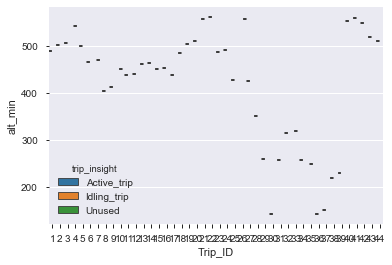

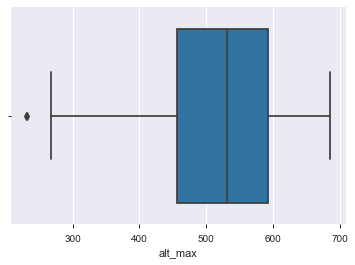

In [96]:
sns.boxplot(x=trip_info_df['Trip_ID'],y=trip_info_df['alt_min'],hue=trip_info_df['trip_insight'])
plt.show()
sns.boxplot(x=trip_info_df['alt_max'],hue=trip_info_df['trip_insight'])
plt.show()

In [75]:
active_trip=trip_info_df.groupby('trip_insight').describe()

In [80]:
active_trip[['alt_max','alt_min']]

alt_max                                                     \
               count        mean         std     min       25%      50%   
trip_insight                                                              
Active_trip     38.0  514.563158  118.488945  229.87  458.8125  544.475   
Idling_trip      5.0  416.736000  116.375389  267.68  323.1600  460.940   
Unused           1.0  573.230000         NaN  573.23  573.2300  573.230   

                             alt_min                                           \
                 75%     max   count        mean         std     min      25%   
trip_insight                                                                    
Active_trip   596.62  685.95    38.0  418.824447  124.630264  141.66  364.085   
Idling_trip   488.04  543.86     5.0  407.548000  119.814329  249.59  319.730   
Unused        573.23  573.23     1.0  558.990000         NaN  558.99  558.990   

                                       
                 50%      75%     max  
trip_insight                           
Active_trip   457.73  504.935  563.14  
Idling_trip   452.61  471.950  543.86  
Unused        558.99  558.990  558.99

C:\Users\devanandh.v\AppData\Roaming\Python\Python36\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\devanandh.v\AppData\Roaming\Python\Python36\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\devanandh.v\AppData\Roaming\Python\Python36\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\devanandh.v\AppData\Roaming\Python\Python36\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


trip_insight
Active_trip    AxesSubplot(0.125,0.125;0.775x0.755)
Idling_trip    AxesSubplot(0.125,0.125;0.775x0.755)
Unused         AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

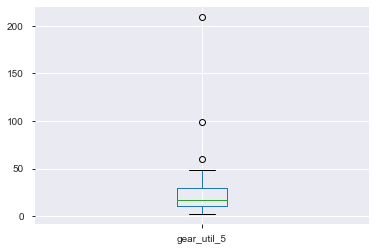

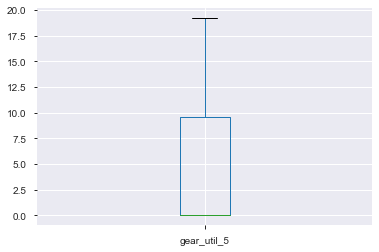

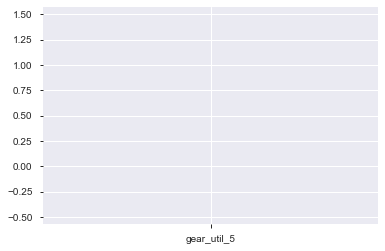

In [23]:
trip_info_df.groupby('trip_insight').plot(y='gear_util_5',kind='box')

Active_trip         AxesSubplot(0.1,0.559091;0.363636x0.340909)
Idling_trip    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
Unused                  AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

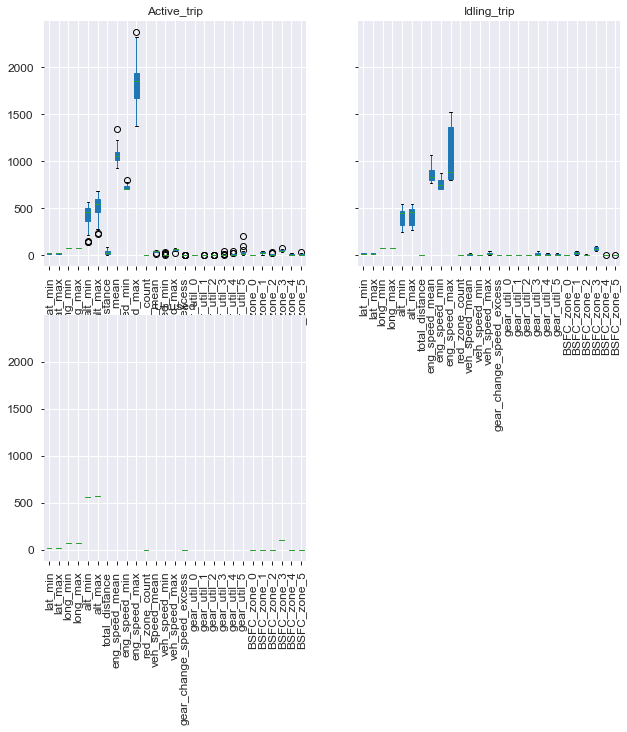

In [57]:

trip_info_df.drop(['Start_index','Stop_index','Trip_ID'],axis=1
                 ).groupby('trip_insight').boxplot(rot=90,fontsize=12,figsize=(10,10),patch_artist=True)


In [62]:
def plot_trip_info(df):
    sns.pairplot(df,x_vars='wheel_based_speed',y_vars='engine_speed',hue='transmission_current_gear',size=5)
    plt.title("Trip")
    sns.pairplot(df, x_vars='engine_speed', y_vars='actual_engine_percent_torque',hue='BSFC_rating',size=5)
    plt.title("Trip")
    sns.pairplot(df, x_vars='latitude', y_vars='longitude',hue='wheel_based_speed',size=5)
    plt.title("Trip")
    plt.show()
    ## Summary trip consolidation
    
       
    #average_eng_speed = round(df['engine_speed'].mean(),0)
    #total_distance = df['vehicle_distance'].max()-df['vehicle_distance'].min()
    #print("Average engine speed: ",average_eng_speed," rpm")
    #print("Average vehicle speed: ",average_veh_speed," kmph")
    #print("Red zone counts: ",red_zone_count," times")
    #print("Max gear util: ",max_gear_util," %")
    #print("BSFC zone 0 % :", BSFC_rating_0)
    #print("BSFC zone 1 % :", BSFC_rating_1)
    #print("BSFC zone 2 % :", BSFC_rating_2)
    #print("BSFC zone 3 % :", BSFC_rating_3)
    #print("BSFC zone 4 % :", BSFC_rating_4)
    #print("BSFC zone 5 % :", BSFC_rating_5)
    #print("trip_distance :",total_distance)

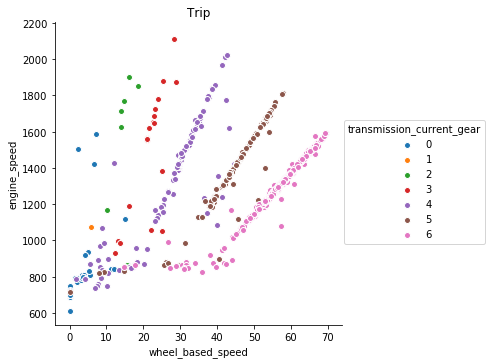

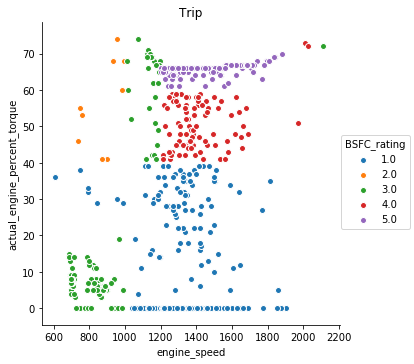

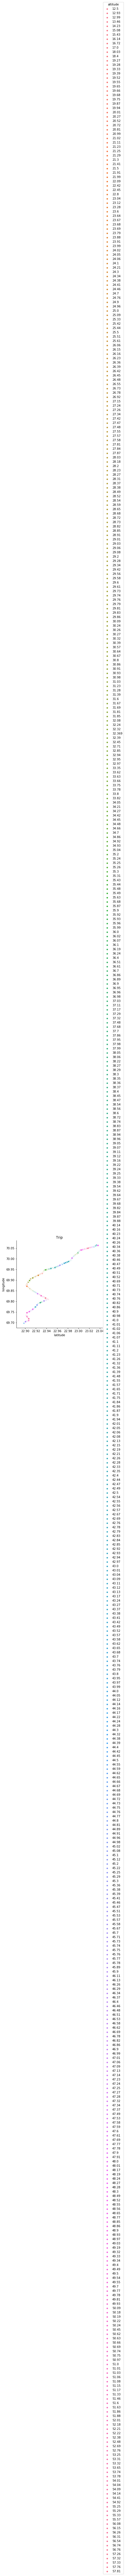

In [32]:
plot_trip_info(trip[14])

In [27]:
trip[4].vehicle_distance.describe()

count     273.000000
mean     3795.117216
std         2.829888
min      3791.000000
25%      3793.000000
50%      3795.000000
75%      3797.000000
max      3800.000000
Name: vehicle_distance, dtype: float64

In [28]:
trip[5].wheel_based_speed

0      23.64
1      31.98
2      41.34
3      45.65
4      48.25
       ...  
409     8.38
410     9.33
411     3.73
412     6.66
413     0.00
Name: wheel_based_speed, Length: 414, dtype: float64